<div style='background-image: url("../share/Aerial_view_LLNL.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.8) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">2014 South Napa Earthquake</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Basic Event Search</div>
        </div>
    </div>
</div>

### **2017 CIG-LLNL Computational Seismology Workshop**


##### Authors:
* Artie Rogers
* Lion Krischer ([@krischer](https://github.com/krischer))
---

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
import obspy
from obspy.clients.fdsn import Client

First set parameters

In [3]:
# Time period limits 
tstart = obspy.UTCDateTime("2014-08-24")
tend = obspy.UTCDateTime("2014-09-30")

# Geographic limits 
min_lon = -122.9
max_lon = -122.0
min_lat = 38.0
max_lat = 38.7

# Magnitude limits
min_mag = 2.0
max_mag = 6.5

# Data center
data_center = 'NCEDC'

Now we can run the query

In [4]:
client = Client(data_center)
print ('... running query ...')

cat = client.get_events(starttime=tstart, endtime=tend,
                        minlatitude=min_lat, minlongitude=min_lon, 
                        maxlatitude=max_lat, maxlongitude=max_lon,
                        minmagnitude=min_mag, maxmagnitude=max_mag,
                        includeallmagnitudes=False)

# Report number of events            
print ('... DONE! '+ str(len(cat)) +' event(s) in cat')   

... running query ...
... DONE! 70 event(s) in cat


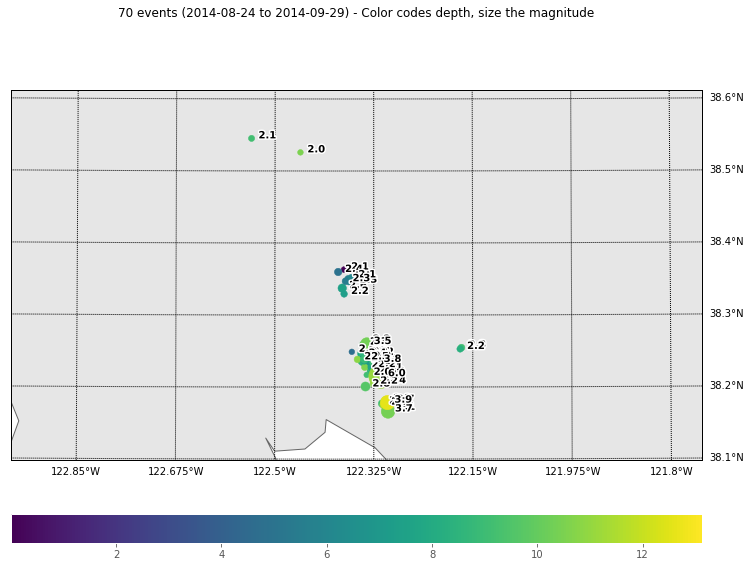

In [6]:
# Plot events
cat.plot(projection='local', resolution="i");

Now write out the found events to files on disc.

In [7]:
# QuakeML - built into ObsPy.
cat.write("catalog.xml", format="quakeml")

# Custom CSV format.
with open("catalog.txt", "w") as fh:
    fh.write('# lon, lat, depth_km, mag, time, event_ID\n')
    for event in cat:
        fh.write('%.4f, %.4f, %8.2f, %.2f, %s, %s\n' % (
            event.origins[0].longitude,
            event.origins[0].latitude,
            event.origins[0].depth / 1000.0,
            event.magnitudes[0].mag,
            event.origins[0].time,
            str(event.resource_id).split('/')[-1]))
        
!head -n 5 catalog.txt

# lon, lat, depth_km, mag, time, event_ID
-122.3133, 38.2077,     9.50, 2.32, 2014-09-29T19:49:14.750000Z, 72317101
-122.3033, 38.1770,    11.71, 2.50, 2014-09-29T07:17:01.220000Z, 72316546
-122.3245, 38.2347,     8.90, 2.34, 2014-09-28T17:26:01.690000Z, 72315896
-122.3437, 38.2480,     7.89, 2.52, 2014-09-26T16:38:42.100000Z, 72311841
